In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.cluster import KMeans

In [16]:
#using clean data
data = pd.read_csv("C:/Users/khan1/OneDrive/Desktop/Classes smu/Fall Mod B/datamining/hw2clean/DM hw2 dataset_clean.csv")

 
data.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,-1,-1,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,-1,-1,-1,-1,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,-1,-1,-1,-1,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,-1,-1,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [17]:
# Renaming since column name is too long. Default can be used as base
data.rename(columns = {'default payment next month': 'default'}, inplace = True)            

In [18]:
#values in sex column
data.SEX.value_counts()

2    17855
1    11746
Name: SEX, dtype: int64

## Q2.1 How is Bill_Amt1 distributed by sex?
 

[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

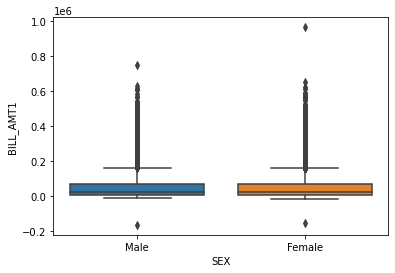

In [19]:
sns.boxplot(x = "SEX", y ="BILL_AMT1", data = data).set_xticklabels(["Male","Female"])

## Q2.2 Does there appear to be any relationship between default and AGE?


<AxesSubplot:xlabel='AGE', ylabel='Count'>

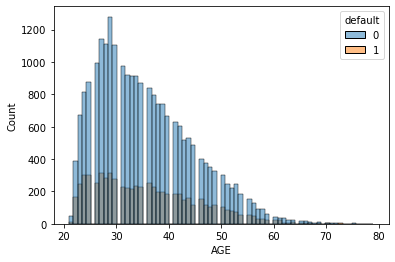

In [20]:
sns.histplot(x = 'AGE', hue = 'default', data = data)

# Finding Best k value

## Build a model of default using kNN. Randomly partition the data into a training set (70%) and a validation set (30%). What value of k did you decide to use and why?

In [7]:
y = data['default']
X = data.drop('default', axis = 1)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

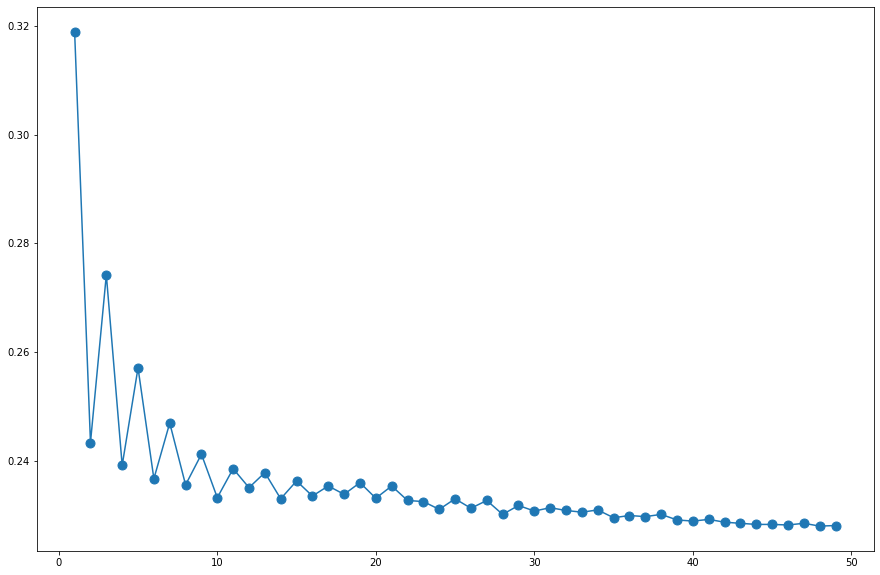

In [8]:
#reference - https://datascienceplus.com/k-nearest-neighbors-knn-with-python/

error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(15,10))
plt.plot(range(1,50),error_rate, marker='o', markersize=9)

## Q3.4 Use k-means clustering to segment the customers on AGE. What value of k did you decide to use and why?

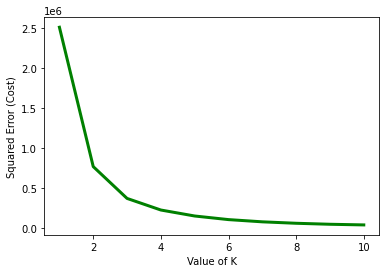

In [9]:
# Optimial K for kmeasn
##reference eg : https://michael-fuchs-python.netlify.app/2020/05/19/k-means-clustering/#introducing-k-means


age = data['AGE'].to_numpy().reshape(-1, 1)

cost =[]
for i in range(1, 11):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(age)
     
    # calculates squared error
    # for the clustered points
    cost.append(KM.inertia_)    
 
# plot the cost against K values
plt.plot(range(1, 11), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show() # clear the plot
 
# the point of the elbow is the
# most optimal value for choosing k



In [10]:
##EDA

In [11]:
data.default.value_counts()
data.default.value_counts()[1]/data.default.value_counts()[0] *100

data.default.value_counts()


0    22996
1     6605
Name: default, dtype: int64

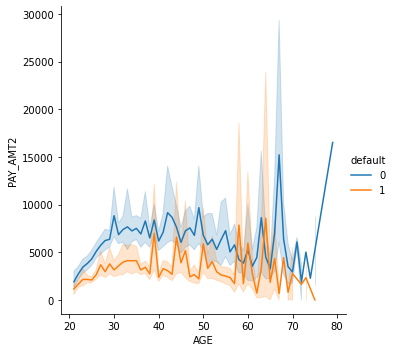

In [21]:
 

sns.relplot(x = 'AGE', y = 'PAY_AMT2',  hue = 'default',kind ='line'  ,data = data)


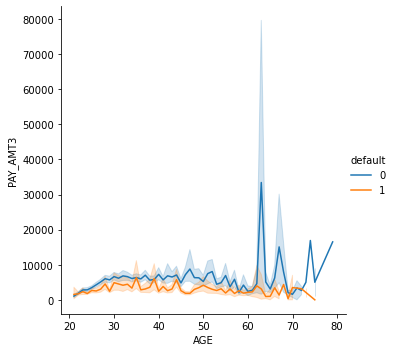

In [22]:
sns.relplot(x = 'AGE', y = 'PAY_AMT3',  hue = 'default',kind ='line'  ,data = data)
 

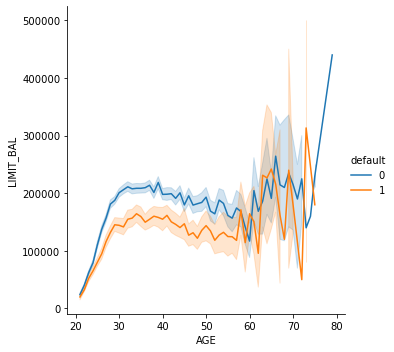

In [23]:
sns.relplot(x = 'AGE' ,y = 'LIMIT_BAL', hue = 'default', kind ='line',data = data)
